[INFO] 
labels: 
 [0 1 2 3 4 5 6 7 8 9] 
count per class 
 [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]
Training set dimensions: 60000 x 784
Test set dimensions: 10000 x 784
5


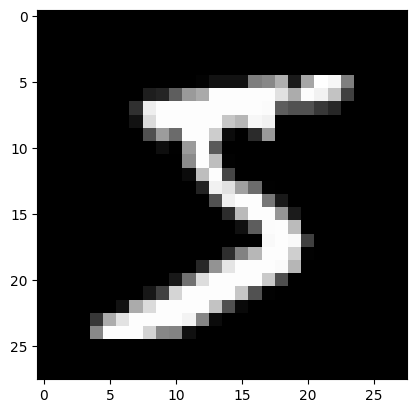

In [2]:
#load data
import numpy as np
import matplotlib.pyplot       as plt
from mlxtend.data import loadlocal_mnist

X_train, y_train = loadlocal_mnist(
        images_path='MNIST/train-images-idx3-ubyte', 
        labels_path='MNIST/train-labels-idx1-ubyte')

X_test, y_test = loadlocal_mnist(
        images_path='MNIST/t10k-images-idx3-ubyte', 
        labels_path='MNIST/t10k-labels-idx1-ubyte')

labels,count_class = np.unique(y_train,return_counts=True)


print('[INFO] \nlabels: \n %s \ncount per class \n %s' % (labels,count_class))
print('Training set dimensions: %s x %s' % (X_train.shape[0],X_train.shape[1]))
print('Test set dimensions: %s x %s' % (X_test.shape[0], X_test.shape[1]))

dim1=28
dim2=28     
image = X_train[0].reshape((28,28))
print(y_train[0])
plt.imshow(image,cmap="gray");



In [3]:
#multilayer feedforward
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [15]:
num_classes = labels.size


model = Sequential()

#add model layers
model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        36896     
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                184330    
                                                                 
Total params: 222,506
Trainable params: 222,506
Non-trainable params: 0
_________________________________________________________________


In [12]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train, num_classes=num_classes)
test_labels = to_categorical(y_test, num_classes=num_classes)

print('convertir: ',y_train[0],' a one hot encoding : ',train_labels[0])

convertir:  5  a one hot encoding :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

3


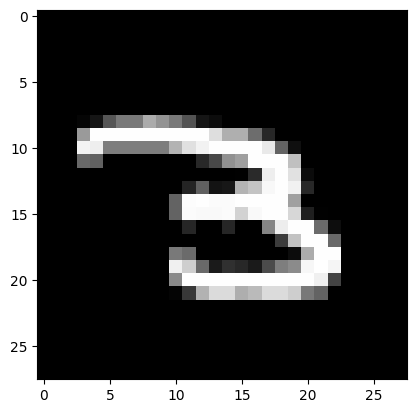

In [7]:
indx = 250
image = X_train[indx,:,:,0]
print(y_train[indx])
plt.imshow(image,cmap="gray");



In [16]:
#'binary_crossentropy'
#'categorical_crossentropy'

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, train_labels, epochs=5, batch_size=100)

Epoch 1/5
600/600 [==============================] - 43s 72ms/step - loss: 0.2983 - accuracy: 0.9422
Epoch 2/5
600/600 [==============================] - 44s 73ms/step - loss: 0.0733 - accuracy: 0.9775
Epoch 3/5
600/600 [==============================] - 44s 73ms/step - loss: 0.0496 - accuracy: 0.9844
Epoch 4/5
600/600 [==============================] - 43s 72ms/step - loss: 0.0342 - accuracy: 0.9890
Epoch 5/5
600/600 [==============================] - 43s 72ms/step - loss: 0.0280 - accuracy: 0.9908


In [9]:
predictions = model.predict(X_test)
predIdxs = np.argmax(predictions, axis=1)
predIdxs[:10]

313/313 [==============================] - 11s 34ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)



10 primeras imagenes de prueba
etiqueta 10 primeras imagenes de prueba:   [7 2 1 0 4 1 4 9 5 9] 
prediccion 10 primeras imagenes de prueba: [7 2 1 0 4 1 4 9 5 9]


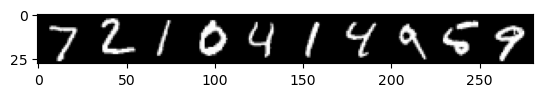

In [20]:
images =  np.zeros((28,1))
for i in range(10):
    image = X_test[i].reshape((28,28))    
    images=np.append(images,image,axis=1)
    
print("\n\n10 primeras imagenes de prueba")    
plt.imshow(images,cmap="gray");

print("etiqueta 10 primeras imagenes de prueba:  ",y_test[:10],\
      "\nprediccion 10 primeras imagenes de prueba:",predIdxs[:10])


In [17]:
_, accuracy = model.evaluate(X_test, test_labels)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 14s 43ms/step - loss: 0.1081 - accuracy: 0.9761
Accuracy: 97.61
